<a href="https://colab.research.google.com/github/themanoftalent/machine-learning_python/blob/main/Apple_Dataset_using_LSTM_and_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#important libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, SimpleRNN, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
# Some functions to load and preprocess data
def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath)
    data = data['Close'].values
    data = data.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    train_size = int(len(data) * 0.80)
    train, test = data[:train_size, :], data[train_size:, :]
    return train, test, scaler

In [ ]:
# A function to create dataset with given look-back period
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:

# A func to build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=96, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=96))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# A func to build the RNN model
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=96, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=96))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# A func to build the GRU model
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=96, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=96, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(units=96))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# A func to plot training loss
def plot_training_loss(history, title):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(f'{title} - Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

In [ ]:
# A func to plot predictions vs real values
def plot_predictions(Y_test, test_predict, title):
    plt.plot(Y_test, color='blue', label='Real Apple Stock Price')
    plt.plot(test_predict, color='red', label='Predicted Apple Stock Price')
    plt.title(f'{title} - Apple Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Apple Stock Price')
    plt.legend()
    plt.show()

In [ ]:
# A func to evaluate the model
def evaluate_model(Y_test, test_predict):
    mse = mean_squared_error(Y_test, test_predict)
    mae = mean_absolute_error(Y_test, test_predict)
    r2 = r2_score(Y_test, test_predict)
    return mse, mae, r2

In [ ]:
# A func to plot error
def plot_error_distribution(Y_test, pred, title):
    plt.figure(figsize=(12, 6))
    errors = Y_test - pred
    plt.hist(errors, bins=50, alpha=0.5, label='Errors')
    plt.title(f'{title} - Error Distribution')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Epoch 1/100
152/152 - 16s - loss: 0.0553 - val_loss: 0.0062 - 16s/epoch - 104ms/step
Epoch 2/100
152/152 - 1s - loss: 0.0190 - val_loss: 0.0037 - 1s/epoch - 8ms/step
Epoch 3/100
152/152 - 2s - loss: 0.0078 - val_loss: 3.5099e-04 - 2s/epoch - 10ms/step
Epoch 4/100
152/152 - 2s - loss: 8.7631e-04 - val_loss: 8.6378e-05 - 2s/epoch - 11ms/step
Epoch 5/100
152/152 - 1s - loss: 9.3405e-04 - val_loss: 9.4151e-05 - 1s/epoch - 8ms/step
Epoch 6/100
152/152 - 1s - loss: 8.4454e-04 - val_loss: 9.6992e-05 - 1s/epoch - 9ms/step
Epoch 7/100
152/152 - 2s - loss: 7.5141e-04 - val_loss: 9.2536e-05 - 2s/epoch - 11ms/step
Epoch 8/100
152/152 - 2s - loss: 7.0384e-04 - val_loss: 7.6366e-05 - 2s/epoch - 10ms/step
Epoch 9/100
152/152 - 1s - loss: 7.4870e-04 - val_loss: 9.9136e-05 - 1s/epoch - 9ms/step
Epoch 10/100
152/152 - 2s - loss: 6.5964e-04 - val_loss: 8.5116e-05 - 2s/epoch - 11ms/step
Epoch 11/100
152/152 - 2s - loss: 5.7186e-04 - val_loss: 8.8568e-05 - 2s/epoch - 14ms/step
Epoch 12/100
152/152 - 2s - l

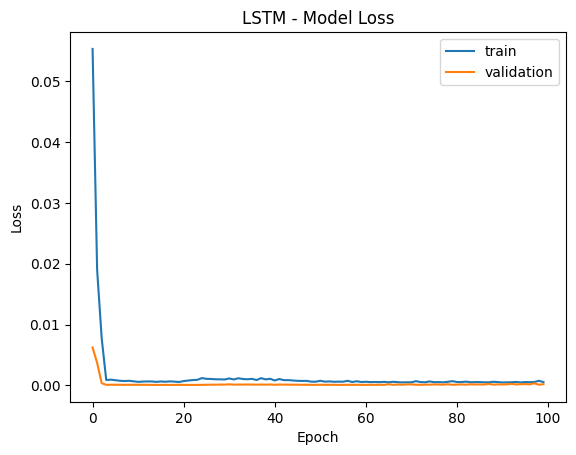

38/38 [==============================] - 1s 3ms/step


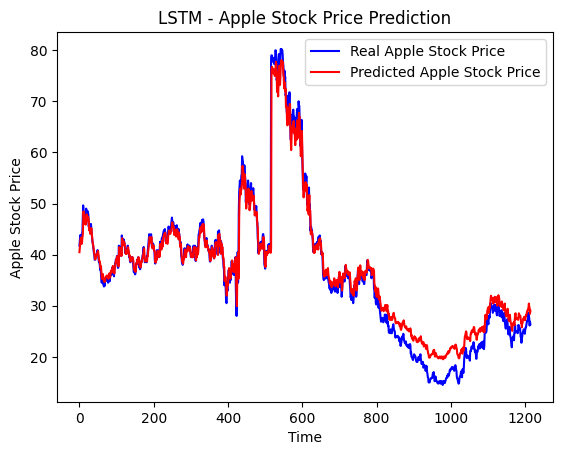

Epoch 1/100
152/152 - 5s - loss: 0.0185 - val_loss: 6.7687e-05 - 5s/epoch - 33ms/step
Epoch 2/100
152/152 - 1s - loss: 0.0022 - val_loss: 8.2118e-05 - 717ms/epoch - 5ms/step
Epoch 3/100
152/152 - 1s - loss: 0.0021 - val_loss: 1.1287e-04 - 708ms/epoch - 5ms/step
Epoch 4/100
152/152 - 1s - loss: 0.0021 - val_loss: 1.3053e-04 - 795ms/epoch - 5ms/step
Epoch 5/100
152/152 - 1s - loss: 0.0018 - val_loss: 1.0206e-04 - 781ms/epoch - 5ms/step
Epoch 6/100
152/152 - 1s - loss: 0.0014 - val_loss: 7.1470e-05 - 791ms/epoch - 5ms/step
Epoch 7/100
152/152 - 1s - loss: 0.0012 - val_loss: 6.7873e-05 - 686ms/epoch - 5ms/step
Epoch 8/100
152/152 - 1s - loss: 0.0010 - val_loss: 9.9975e-05 - 770ms/epoch - 5ms/step
Epoch 9/100
152/152 - 1s - loss: 0.0011 - val_loss: 1.1002e-04 - 766ms/epoch - 5ms/step
Epoch 10/100
152/152 - 1s - loss: 0.0011 - val_loss: 8.5053e-05 - 698ms/epoch - 5ms/step
Epoch 11/100
152/152 - 1s - loss: 0.0011 - val_loss: 2.2179e-04 - 719ms/epoch - 5ms/step
Epoch 12/100
152/152 - 1s - loss

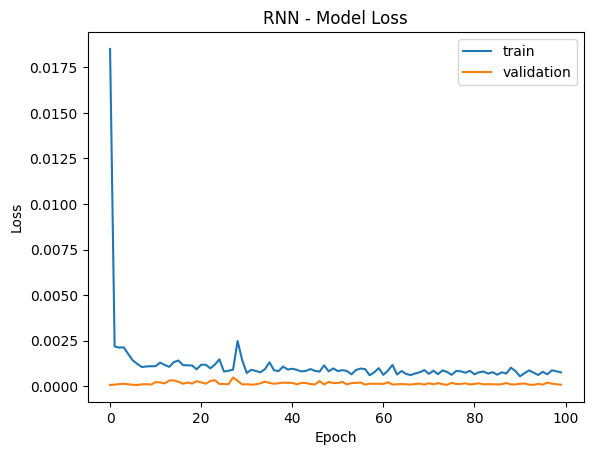

38/38 [==============================] - 0s 2ms/step


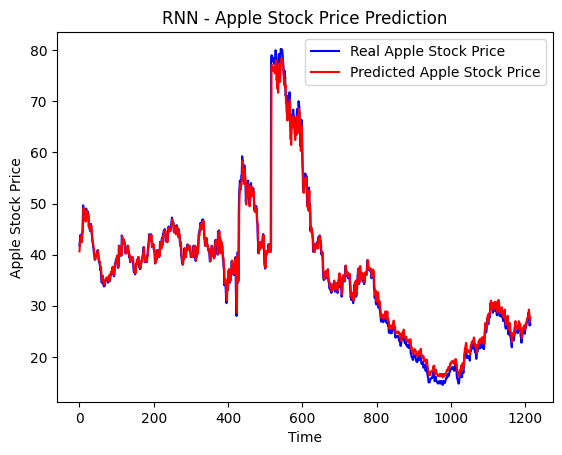

Epoch 1/100
152/152 - 9s - loss: 0.0436 - val_loss: 0.0054 - 9s/epoch - 62ms/step
Epoch 2/100
152/152 - 1s - loss: 0.0133 - val_loss: 0.0011 - 1s/epoch - 7ms/step
Epoch 3/100
152/152 - 1s - loss: 0.0033 - val_loss: 1.1819e-04 - 1s/epoch - 7ms/step
Epoch 4/100
152/152 - 1s - loss: 9.7171e-04 - val_loss: 8.2029e-05 - 1s/epoch - 8ms/step
Epoch 5/100
152/152 - 1s - loss: 8.8581e-04 - val_loss: 7.1686e-05 - 1s/epoch - 7ms/step
Epoch 6/100
152/152 - 1s - loss: 7.9999e-04 - val_loss: 7.3386e-05 - 1s/epoch - 8ms/step
Epoch 7/100
152/152 - 1s - loss: 7.6910e-04 - val_loss: 9.0519e-05 - 1s/epoch - 7ms/step
Epoch 8/100
152/152 - 1s - loss: 8.8801e-04 - val_loss: 7.1087e-05 - 1s/epoch - 8ms/step
Epoch 9/100
152/152 - 1s - loss: 7.3180e-04 - val_loss: 9.2046e-05 - 1s/epoch - 8ms/step
Epoch 10/100
152/152 - 2s - loss: 8.8342e-04 - val_loss: 9.0186e-05 - 2s/epoch - 10ms/step
Epoch 11/100
152/152 - 2s - loss: 7.8615e-04 - val_loss: 1.0931e-04 - 2s/epoch - 11ms/step
Epoch 12/100
152/152 - 1s - loss: 9.

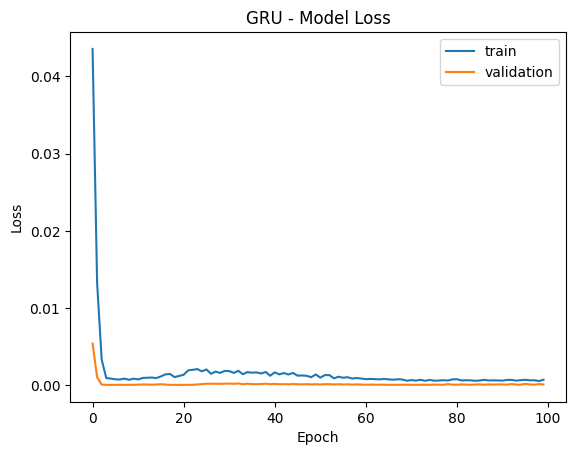

38/38 [==============================] - 1s 3ms/step


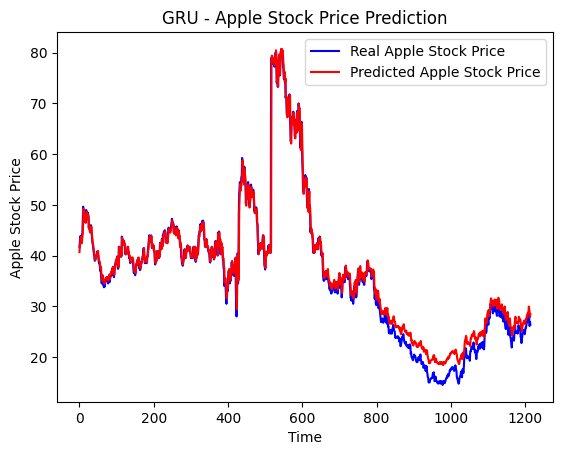

LSTM - MSE: 6.570191247881507, MAE: 1.8316236340558083, R2: 0.9661728617921101
RNN - MSE: 2.8172747632781987, MAE: 1.0140207201796791, R2: 0.9854950428090293
GRU - MSE: 4.5992259186527855, MAE: 1.4725675662947288, R2: 0.9763205293529711


In [16]:
# Main file
def main(filepath):
    train, test, scaler = load_and_preprocess_data(filepath)
    look_back = 1
    X_train, Y_train = create_dataset(train, look_back)
    X_test, Y_test = create_dataset(test, look_back)

    # Reshape input
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Train LSTM
    lstm_model = build_lstm_model((X_train.shape[1], 1))
    lstm_history = lstm_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2, shuffle=False)
    plot_training_loss(lstm_history, 'LSTM')
    lstm_predict = lstm_model.predict(X_test)
    lstm_predict = scaler.inverse_transform(lstm_predict)
    Y_test_scaled = scaler.inverse_transform(Y_test.reshape(-1, 1))
    plot_predictions(Y_test_scaled, lstm_predict, 'LSTM')
    lstm_mse, lstm_mae, lstm_r2 = evaluate_model(Y_test_scaled, lstm_predict)

    # Train RNN model
    rnn_model = build_rnn_model((X_train.shape[1], 1))
    rnn_history = rnn_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2, shuffle=False)
    plot_training_loss(rnn_history, 'RNN')
    rnn_predict = rnn_model.predict(X_test)
    rnn_predict = scaler.inverse_transform(rnn_predict)
    plot_predictions(Y_test_scaled, rnn_predict, 'RNN')
    rnn_mse, rnn_mae, rnn_r2 = evaluate_model(Y_test_scaled, rnn_predict)

    # Train GRU model
    gru_model = build_gru_model((X_train.shape[1], 1))
    gru_history = gru_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2, shuffle=False)
    plot_training_loss(gru_history, 'GRU')
    gru_predict = gru_model.predict(X_test)
    gru_predict = scaler.inverse_transform(gru_predict)
    plot_predictions(Y_test_scaled, gru_predict, 'GRU')
    gru_mse, gru_mae, gru_r2 = evaluate_model(Y_test_scaled, gru_predict)

    # Print results
    print(f'LSTM - MSE: {lstm_mse}, MAE: {lstm_mae}, R2: {lstm_r2}')
    print(f'RNN - MSE: {rnn_mse}, MAE: {rnn_mae}, R2: {rnn_r2}')
    print(f'GRU - MSE: {gru_mse}, MAE: {gru_mae}, R2: {gru_r2}')

if __name__ == "__main__":
    main('/kaggle/input/appledataset/aapl.csv')


----